# Using Elbow Method to find the optimal number of clusters

Elbow method is applied to find optimal number of clusters for K-means clustering. 

**Remark.** A business/research objective is a priority for determination of the best cluster number. 
In particular we may choose clustering which is not the best geometrically 
but it makes the most sense for understanding of data structure.


Here is how K-means method is used with Python to divide a set into groups, or clusters:
https://pythonprogramminglanguage.com/kmeans-clustering-algorithm/

And here is Elbow method:
https://pythonprogramminglanguage.com/kmeans-elbow-method/

To utilize it we need a metric from K-means module to measure total sum of tightnesses for each cluster. Then we plot metric values for different number of clusters. We connect the dots for each metric value and choose the number for which we see the smallest angle above a corresponding point at our plot. 

The method is not reliable because it relies on visual angle estimations. I will start with showing how it fails for some cases. 

At first let us generate a data set with 9 clusters. This will be our example with well separated clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# number of clusters: real and assumed for testing.
true_cluster_n = 9

points_per_cluster = 300

possible_cluster_n = 20

X = None
for i in range(true_cluster_n):
    x = np.random.normal(loc=i, size=points_per_cluster, scale=0.2)
    y = np.random.normal(loc=i, size=points_per_cluster, scale=0.2)
    data = np.column_stack([x, y , np.array([i]*points_per_cluster)])
    if X is None:
        X = data
    else:
        X = np.row_stack([X, data])


In [2]:
scaler_x = StandardScaler()
X[:, :2] = scaler_x.fit_transform(X[:, :2] )

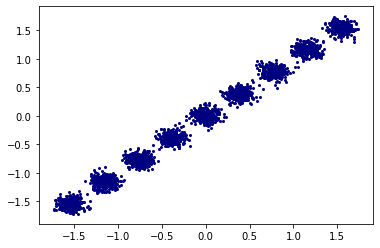

In [3]:
plt.plot(X[:, 0], X[:, 1], "o", ms=2, c = "navy" )

We got 9 distinct clusters. They are well suited for K-means method because they are tight and clearly separated. Now we can compute a metric called "within cluster sums of squares". We will do it for a range of assumed cluster numbers from 1 to 20.

**Remark.** About `sklearn.datasets.make_blobs`  method for clusters: I have tried it, and it is not very reliable for getting 10 distinct clusters. They may clump together, as you see below.

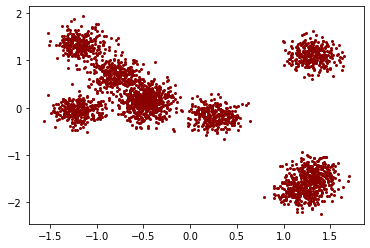

In [4]:
Y, y = make_blobs(n_samples=(points_per_cluster*true_cluster_n), centers= true_cluster_n, n_features=2, random_state=12)
scaler_y = StandardScaler()
Y = scaler_y.fit_transform(Y)
plt.plot(Y[:, 0], Y[:, 1], 'o', markersize=2, c='darkred')

I do not see 9 clusters here, only 7. What happened? Let us distinguish the clusters by color.

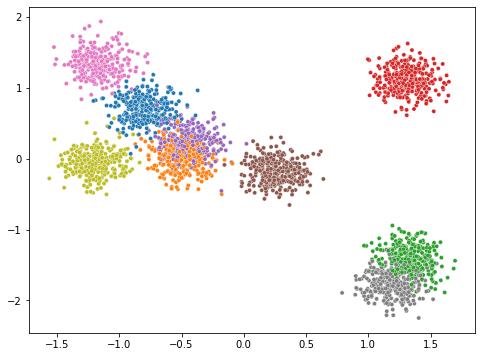

In [5]:

def plot_9_Clusters(data, centers):
    plt.rcParams['figure.figsize'] = [8, 6]
    colors=['#d73027']*len(y)
    # ['#d73027','#f46d43','#fdae61','#fee090','#e0f3f8','#abd9e9','#74add1','#4575b4']
    for i in range(len(colors)):
        if (centers[i] ==0):
            colors[i] = '#f46d43'
        elif (centers[i]==1):
            colors[i] = '#fdae61'
        elif (centers[i]==2):
            colors[i] = '#fee090'
        elif (centers[i]==3):
            colors[i] = '#e0f3f8'
        elif (centers[i]==4):
            colors[i] = '#abd9e9'
        elif (centers[i]==5):
            colors[i] = '#74add1'
        elif (centers[i]==6):
            colors[i] = '#4575b4'
        elif (centers[i]==7):
            colors[i] = 'navy'
 
    sb.scatterplot(data[:, 0], data[:, 1], hue=colors, size = 2,  legend=False)

plot_9_Clusters(Y, y)

As we see some of them are clumped together. Elbow method with K-means favors roundish clusters, and if you want to pick up clusters of different shape, you need to apply another method.

## Computing within-cluster sum of squares measure (WCSS)
## for cluster numbers from 1 to `possible_cluster_n`

In [6]:
within_cluster_sum_squares = np.zeros(possible_cluster_n)

for i in range(possible_cluster_n):
    n = i+1
    kmeans = KMeans(n_clusters = n, init = 'k-means++', max_iter=500, n_init=20, random_state = 0)
    kmeans.fit(X)
    within_cluster_sum_squares[i] = kmeans.inertia_
    
np.set_printoptions(suppress=True)
np.around(within_cluster_sum_squares, 2)

array([23400.  ,  5872.65,  2371.19,  1389.97,   806.97,   612.71,
         419.28,   225.71,    32.74,    31.48,    30.19,    28.93,
          27.66,    26.46,    25.45,    24.09,    22.84,    21.98,
          20.93,    19.94])

We can observe that for first 9 steps the values decrease rapidly, but afterwards they level out and do not decrease as quickly anymore. So numerically Elbow method must pick up on this. Of course a picture would be more convenient than sifting numbers.

## Plots to show difficulties with Elbow method
I will show you the same graph with different scaling of vertical axis. Below we see a usual picture for Elbow method.

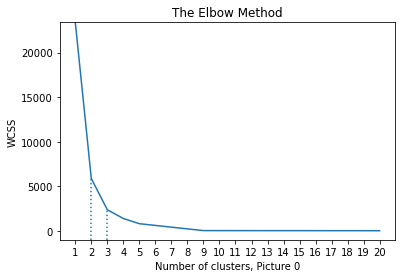

In [7]:
plt.rcParams['figure.figsize'] = [6, 4]
fig, ax = plt.subplots()

ax.plot(within_cluster_sum_squares)
ax.vlines(x=1,  ymin=-1000, ymax=within_cluster_sum_squares[1], linestyles='dotted')
ax.vlines(x=2,  ymin=-1000, ymax=within_cluster_sum_squares[2], linestyles='dotted')
ax.set_ylim(-1000, within_cluster_sum_squares[0])
xticks = np.arange(possible_cluster_n)
xticklabels = xticks + 1
ax.set(xticks=xticks, xticklabels=xticklabels, title='The Elbow Method', 
       xlabel='Number of clusters, Picture 0', ylabel='WCSS');

Here visually detecting the best number of clusters is questionable. Currently only angles for numbers 2 and 3 look like good candidates, but we know that the best number of clusters here is 9. The reason for the mistake is that scaling along the vertical axis to fit the plot into our page distorted our visualization. We can change observed intervals and  look at different parts of the plot, thus discovering the phenomena. (You can find a video in the repository which shows how look of the graph changes when its horizontal axis is compressed.) Below we see plots with consequent reducing of upper bound for vertical axis, which stretches the graph vertically.

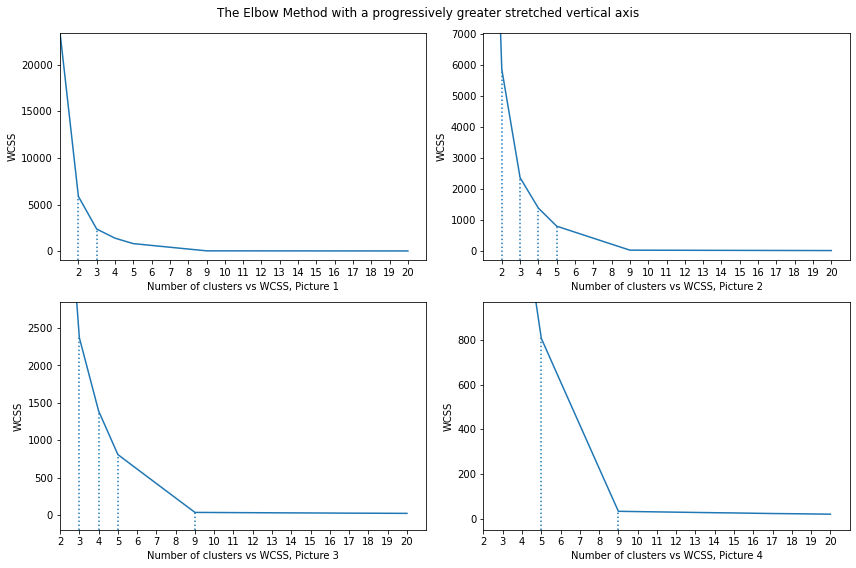

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('The Elbow Method with a progressively greater stretched vertical axis')
xticks = np.arange(1, possible_cluster_n)
xticklabels = xticks + 1
axs[0, 0].plot(within_cluster_sum_squares) # an upper left corner
axs[0, 0].set_xlim(0, possible_cluster_n)
axs[0, 0].set_ylim(-1000, within_cluster_sum_squares[0])
axs[0, 0].vlines(x=1,  ymin=-1000, ymax=within_cluster_sum_squares[1], linestyles='dotted')
axs[0, 0].vlines(x=2,  ymin=-1000, ymax=within_cluster_sum_squares[2], linestyles='dotted')
axs[0, 0].set(xticks=xticks, xticklabels=xticklabels, title=None, 
             xlabel='Number of clusters vs WCSS, Picture 1', ylabel='WCSS');

axs[0,1].plot(within_cluster_sum_squares) # an upper right corner
axs[0,1].set_xlim(0, possible_cluster_n)
axs[0,1].set_ylim(-300, 1.2*within_cluster_sum_squares[1])
axs[0,1].vlines(x=1,  ymin=-300, ymax=within_cluster_sum_squares[1], linestyles='dotted')
axs[0,1].vlines(x=2,  ymin=-300, ymax=within_cluster_sum_squares[2], linestyles='dotted')
axs[0,1].vlines(x=3,  ymin=-300, ymax=within_cluster_sum_squares[3], linestyles='dotted')
axs[0,1].vlines(x=4,  ymin=-300, ymax=within_cluster_sum_squares[4], linestyles='dotted')

xticks = np.arange(1, possible_cluster_n)
xticklabels = xticks + 1
axs[0,1].set(xticks=xticks, xticklabels=xticklabels, title=None, 
       xlabel='Number of clusters vs WCSS, Picture 2', ylabel='WCSS');

axs[1, 0].plot(within_cluster_sum_squares) # a lower left corner
axs[1, 0].set_xlim(1, possible_cluster_n)
axs[1, 0].set_ylim(-200, 1.2*within_cluster_sum_squares[2])
axs[1, 0].vlines(x=2,  ymin=-200, ymax=within_cluster_sum_squares[2], linestyles='dotted')
axs[1, 0].vlines(x=3,  ymin=-200, ymax=within_cluster_sum_squares[3], linestyles='dotted')
axs[1, 0].vlines(x=4,  ymin=-200, ymax=within_cluster_sum_squares[4], linestyles='dotted')
axs[1, 0].vlines(x=8,  ymin=-200, ymax=within_cluster_sum_squares[8], linestyles='dotted')

xticks = np.arange(1, possible_cluster_n)
xticklabels = xticks + 1
axs[1, 0].set(xticks=xticks, xticklabels=xticklabels, title=None, 
       xlabel='Number of clusters vs WCSS, Picture 3', ylabel='WCSS');

axs[1,1].plot(within_cluster_sum_squares)# a lower right corner
axs[1,1].set_xlim(1, possible_cluster_n)
axs[1,1].set_ylim(-50, 1.2*within_cluster_sum_squares[4])
axs[1,1].vlines(x=4,  ymin=-50, ymax=within_cluster_sum_squares[4], linestyles='dotted')
axs[1,1].vlines(x=8,  ymin=-50, ymax=within_cluster_sum_squares[9], linestyles='dotted')

xticks = np.arange(1, possible_cluster_n)
xticklabels = xticks + 1
axs[1,1].set(xticks=xticks, xticklabels=xticklabels, title=None, 
       xlabel='Number of clusters vs WCSS, Picture 4', ylabel='WCSS');
plt.tight_layout()

As we see these are parts of the same plot and the only differences are changes of horizontal and vertical intervals, which affects how axes are scaled. A visual examination of first picture yields the best number of clusters as 2 or 3, and in the second we see that 4 or 5 could be likely. Previous "good angles" with more steep sides flattened out. Mind you that 
 - In the second picture scaling of its vertical axes differs with the first picture by a multiple of 0.15. 
 - I went as far as 20 clusters because I knew that the best number is somewhere here. 
 Then in Picture 3 we see that 5 clusters are better than 4, but 9 might be a good number, too. Finally in the last picture we see 9 as the best on with the considered scaling.

Hence pictures are helpful only when we know where to look since scaling can distort our angles. But Elbow method is supposed to detect the correct number of clusters, meaning that a priory we cannot know. 

There are ways in math to evaluate angle values without geometric plots.

Let us try to compute the angle cosines. In this case we only want angles with values between 0 and 180 degrees. For these angles the greatest cosine corresponds to the smallest angle. I've added -1 at the start for one cluster (no angle is here) to simplify my coding and replaced all angles which are greater than 180 degrees with -1. The last condition visually looks on our plot like a point situated above a line connecting 2 closest points, so we can use the midpoint formula for this.

In [9]:
# Let us use a shorter variable name
wcss = within_cluster_sum_squares

cosines = -1 * np.ones(possible_cluster_n)

for i in range(possible_cluster_n-1):
   # check if the point is below a midpoint of segment connecting its neighbors
   if (wcss[i] < (wcss[i+1]+wcss[i-1])/2 ):
       cosines[i]= (-1+(wcss[i-1]-wcss[i])*(wcss[i+1]-wcss[i]))/ \
       ((1+(wcss[i-1]-wcss[i])**2)*(1+ (wcss[i+1]-wcss[i])**2))**.5
np.around(cosines, 5)

array([-1.     , -1.     , -1.     , -1.     , -0.99999, -1.     ,
       -1.     , -1.     , -0.78657, -1.     , -0.99988, -1.     ,
       -0.99944, -0.99661, -1.     , -0.99906, -0.98308, -1.     ,
       -0.99968, -1.     ])

Not all cosines computed as -1, but I rounded them so the result will look accurate. Note that we do not need values for the very first and the very last array entries because there is no angle. 

If we check it out we can figure out that 9th number is the greatest value. Let us sort the cosine array and get indices of the smallest angles at the front.

In [10]:
print(np.flip(np.argsort(cosines[1:-1]))+2)

[ 9 17 14 16 13 19 11  5  3  4  2  6  8  7 18 12 15 10]


Clearly the computed cosines are not affected by plot scaling and they are better indication of the best number of clusters. 

**Remark.** Elbow Method works well only for roundish clusters, and tends to prefer smaller ones. When applied to clusterings of other types we may get not unique"optimal" numbers after repeated applications (with different `random_state` parameters).  It is an indication that the procedure does not perform consistently for such data. In this case we may
1. use another clustering measure, like silhouette, 
2. try other clustering methods,
3. introduce weights for most important variables. 

Here is a function for this. 

In [11]:
def ElbowMethod(array, max_cluster_number, min_cluster_number=1, init = 'k-means++', 
                max_iter = 300, n_init = 50, random_state = None, remark=True):
    import numpy as np
    from sklearn.cluster import KMeans
    wcss = np.zeros(max_cluster_number) # a future within_cluster_sum_squares array
    
    for i in range(max_cluster_number):
        n = i+1 # we are to start with at least 1 cluster
        kmeans = KMeans(n_clusters = n, init=init, max_iter=max_iter, n_init=n_init, random_state=random_state)
        kmeans.fit(array)
        wcss[i] = kmeans.inertia_
    
    cosines = -1 * np.ones(max_cluster_number-2)# the agles are between cluster numbers, so 
    # 1st and last do not count
    
    for i in range(max_cluster_number-2):
    # at first check if the point is below a segment midpoint connecting its neighbors
        if (wcss[i+1] < (wcss[i+2]+wcss[i])/2 ):
            cosines[i]= (-1+(wcss[i]-wcss[i+1])*(wcss[i+2]-wcss[i+1]))/ \
            ((1+(wcss[i]-wcss[i+1])**2)*(1+ (wcss[i+2]-wcss[i+1])**2))**.5
    
    if remark:
        print("""Remark:\n\tRemember that the K-means method is randomized and may yield different results for different runs.
        If each time repeated applications of the method(with different random_state parameters)yield  
        different values for the optimal number then Elbow method with K-means does not work well 
        on the array. The method produces roundish clusters and they may be not suitable for 
        your objective.""")
    
    return (np.flip(np.argsort(cosines[1:-1]))+2+min_cluster_number)[0]

# testing a nicely separated date
ElbowMethod(X, possible_cluster_n, max_iter=500)

Remark:
	Remember that the K-means method is randomized and may yield different results for different runs.
        If each time repeated applications of the method(with different random_state parameters)yield  
        different values for the optimal number then Elbow method with K-means does not work well 
        on the array. The method produces roundish clusters and they may be not suitable for 
        your objective.


9

In [12]:
ElbowMethod(array = Y, max_cluster_number = possible_cluster_n, max_iter=500, remark=False)

18

With number of runs I have gotten 9 for the `Y` data most of the time, but I've seen other numbers like 18 once in a while, too. So currently the method is not stable. Let us try it on couple times more, creating a function for this

In [13]:
def examples_with_9_clusters(points_per_cluster, max_cluster_number, random_state=0, n_features=2):
    from sklearn.datasets import make_blobs
    from sklearn.preprocessing import StandardScaler
    data, centers = make_blobs(n_samples=(points_per_cluster*9), centers= true_cluster_n, n_features=n_features, random_state=random_state)
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    if n_features == 2:
        plot_9_Clusters(data, centers)
    return ElbowMethod(array = data, max_cluster_number = max_cluster_number, max_iter=500, remark=False)

9

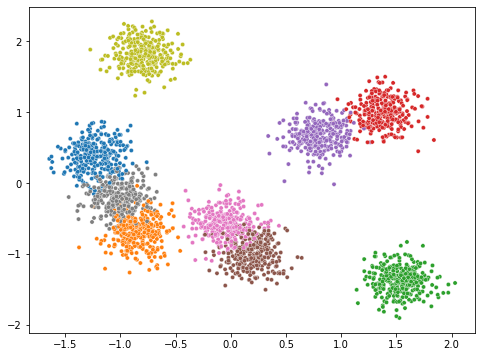

In [14]:
examples_with_9_clusters(points_per_cluster=points_per_cluster, random_state=9, max_cluster_number=16)

In [15]:
examples_with_9_clusters(points_per_cluster=points_per_cluster, random_state=9, 
                         max_cluster_number=16, n_features=3)

9

### Feedback:
1.[@olgabot](https://github.com/olgabot): 
 - The method might give people a wrong idea that their set is easily divided into clusters because they can run a script and get a number. 
   - _My reply:_ At this point I added a remark which is printed out by default, but I plan to make the script to run a few times and see if output changes. It will take much more time, though, and it looks like I need to have options to write them in parallel or sequentially.

2.[@tedkyi](https://github.com/tedkyi): 
- Usually we are to scale our set before cluster method application. (Fixed this).
- The order of cluster numbers which we get from the method is not reliable for obtaining a next best cluster number. 
   - _My reply:_ I believe that it could be fixed using several runs as well, but I did not tried it yet.
    

3.[@wbx4646](https://github.com/wbx4646) It would be good to have a method which counts clusters clumping together as one cluster.

 - _My reply so far:_ 
  - For small data sets Hierarchical method works very well with arbitrary cluster shapes.
  - We might try `Silhouette` metric on our clusters. Currently there is no implemented method to compute the best number of clusters with the metric, although I've seen couple of methods: 
     - a formula for this
     - pictures with explanations.
  - It is possible to run Hierarchical method on cluster centers and to combine some of the clusters. There is no implemented method to define the optimal number of clusters for this.

4.Many people have reminded me that a business/research objective is a priority for determination of cluster number. I added it at the top.